In [13]:
import pandas as pd
import math 
import matplotlib
from matplotlib.cm import get_cmap
import matplotlib.patches as patches
import os
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy import stats

In [14]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import fnmatch
import statistics
import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag

In [15]:
# Define the Haversine function
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    lat1_rad, lon1_rad = np.radians(lat1), np.radians(lon1)
    lat2_rad, lon2_rad = np.radians(lat2), np.radians(lon2)

    dlat, dlon = lat2_rad - lat1_rad, lon2_rad - lon1_rad
    a = np.sin(dlat/2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c

# Read latitude and longitude pairs from CSV files
def read_csv(filename):
    data = []
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            lat, lon = float(row[0]), float(row[1])
            data.append([lat, lon])
    return np.array(data)

# Load data arrays from CSV filessimu2207sim.csv')
data_array1 = read_csv('c:\\users\\jmeer\\PmagPy\\2207checkf.txt')
data_array2 = read_csv('c:\\users\\jmeer\\PmagPy\\2216checkf.txt')
data_array3 = read_csv('c:\\users\\jmeer\\PmagPy\\2252checkf.txt')

# Calculate the great circle distance between each pair of coordinates
distances = np.zeros(data_array1.shape[0])
distances2= np.zeros(data_array1.shape[0])
for i in range(data_array1.shape[0]):
    lat1, lon1 = data_array1[i]
    lat2, lon2 = data_array2[i]
    lat3, lon3 = data_array3[i]
    distances[i] = haversine(lat1, lon1, lat2, lon2)
    distances2[i]= haversine(lat2, lon2, lat3, lon3)
  


46.43 Mean Paleolatitude
4.69 Standard Deviation


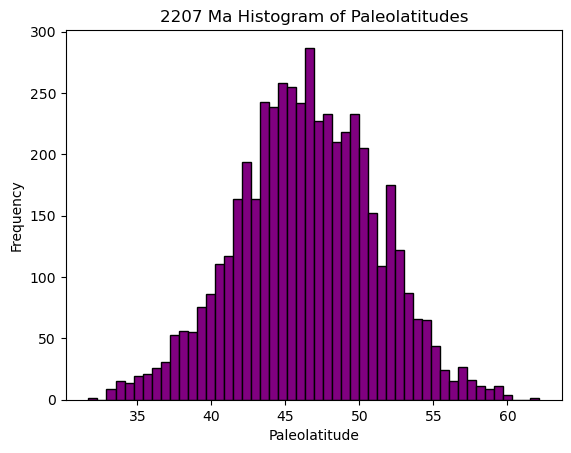

5000 plats saved in plat_1f.txt


<Figure size 640x480 with 0 Axes>

In [16]:
#Paleolatitude Group 1

def calculate_paleolatitude(pole_lat, pole_lon, site_lat, site_lon):
    pole_lat_rad = math.radians(pole_lat)
    pole_lon_rad = math.radians(pole_lon)
    site_lat_rad = math.radians(site_lat)
    site_lon_rad = math.radians(site_lon)

    paleolat_rad = math.asin(math.sin(pole_lat_rad) * math.sin(site_lat_rad) + \
                             math.cos(pole_lat_rad) * math.cos(site_lat_rad) * math.cos(pole_lon_rad - site_lon_rad))

    paleolat = math.degrees(paleolat_rad)
    return paleolat

def read_poles_from_file(file_path):
    poles = []
    with open(file_path, 'r') as file:
        for line in file:
            pole_lat, pole_lon = map(float, line.strip().split(','))
            poles.append((pole_lat, pole_lon))
    return poles

def plot_histogram(paleolatitudes, bins=50):
    plt.hist(paleolatitudes, bins=bins, color='purple', edgecolor='k')
    plt.xlabel('Paleolatitude')
    plt.ylabel('Frequency')
    plt.title('2207 Ma Histogram of Paleolatitudes')
    plt.show()

# Example usage:
file_path = 'c:\\Users\\jmeer\\PmagPy\\2207checkf.txt'
site_lat = 15.7
site_lon = 77.5

poles = read_poles_from_file(file_path)
paleolatitudes = [calculate_paleolatitude(pole_lat, pole_lon, site_lat, site_lon) for pole_lat, pole_lon in poles]
y1=statistics.mean(paleolatitudes)
z1=statistics.stdev(paleolatitudes)
print("{:.2f}".format(y1),"Mean Paleolatitude")
print("{:.2f}".format(z1),"Standard Deviation")
plot_histogram(paleolatitudes)
#####Put Figure File save location next####
plt.savefig('platgroup1.svg')
#save the paleolatitude file
# Save the random numbers to a text file
# Save the random numbers to a text file
output_file_path = 'plat_1f.txt'
with open(output_file_path, 'w') as output_file:
    for number in paleolatitudes:
        output_file.write(str(number) + '\n')

print(f'5000 plats saved in {output_file_path}')


42.93 Mean Paleolatitude
1.69 Standard Deviation


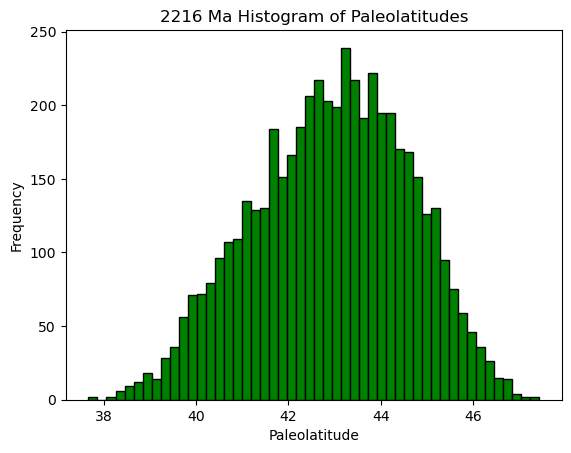

5000 plats saved in plat_2f.txt


<Figure size 640x480 with 0 Axes>

In [17]:
#Paleolatitude Group 2

def calculate_paleolatitude(pole_lat, pole_lon, site_lat, site_lon):
    pole_lat_rad = math.radians(pole_lat)
    pole_lon_rad = math.radians(pole_lon)
    site_lat_rad = math.radians(site_lat)
    site_lon_rad = math.radians(site_lon)

    paleolat_rad = math.asin(math.sin(pole_lat_rad) * math.sin(site_lat_rad) + \
                             math.cos(pole_lat_rad) * math.cos(site_lat_rad) * math.cos(pole_lon_rad - site_lon_rad))

    paleolat = math.degrees(paleolat_rad)
    return paleolat

def read_poles_from_file(file_path):
    poles = []
    with open(file_path, 'r') as file:
        for line in file:
            pole_lat, pole_lon = map(float, line.strip().split(','))
            poles.append((pole_lat, pole_lon))
    return poles
#####Put Figure File save location below####
def plot_histogram(paleolatitudes2, bins=50):
    plt.hist(paleolatitudes2, bins=bins, color='green', edgecolor='k')
    plt.xlabel('Paleolatitude')
    plt.ylabel('Frequency')
    plt.title('2216 Ma Histogram of Paleolatitudes')
    plt.show()
    plt.savefig('platgroup2.svg')

# Reference location usage:
file_path = 'c:\\Users\\jmeer\\PmagPy\\2216checkf.txt'
site_lat = 15.7
site_lon = 77.5

poles = read_poles_from_file(file_path)
paleolatitudes2 = [calculate_paleolatitude(pole_lat, pole_lon, site_lat, site_lon) for pole_lat, pole_lon in poles]
y2=statistics.mean(paleolatitudes2)
z2=statistics.stdev(paleolatitudes2)
print("{:.2f}".format(y2),"Mean Paleolatitude")
print("{:.2f}".format(z2),"Standard Deviation")
#save in file
plot_histogram(paleolatitudes2)
output_file_path = 'plat_2f.txt'
with open(output_file_path, 'w') as output_file:
    for number in paleolatitudes2:
        output_file.write(str(number) + '\n')

print(f'5000 plats saved in {output_file_path}')

50.05 Mean Paleolatitude
3.56 Standard Deviation


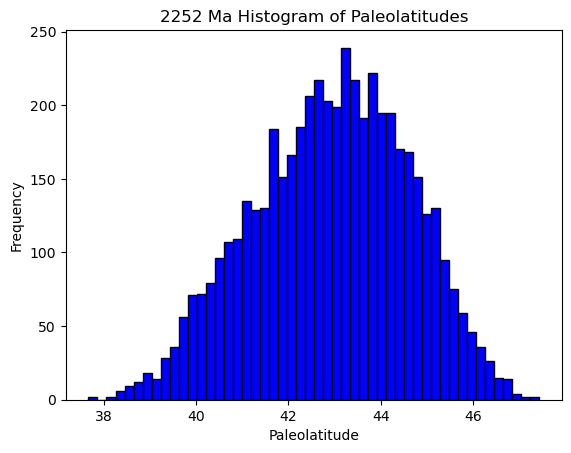

5000 plats saved in plat_3f.txt


<Figure size 640x480 with 0 Axes>

In [20]:
#Paleolatitude Group 3

def calculate_paleolatitude(pole_lat, pole_lon, site_lat, site_lon):
    pole_lat_rad = math.radians(pole_lat)
    pole_lon_rad = math.radians(pole_lon)
    site_lat_rad = math.radians(site_lat)
    site_lon_rad = math.radians(site_lon)

    paleolat_rad = math.asin(math.sin(pole_lat_rad) * math.sin(site_lat_rad) + \
                             math.cos(pole_lat_rad) * math.cos(site_lat_rad) * math.cos(pole_lon_rad - site_lon_rad))

    paleolat = math.degrees(paleolat_rad)
    return paleolat

def read_poles_from_file(file_path):
    poles = []
    with open(file_path, 'r') as file:
        for line in file:
            pole_lat, pole_lon = map(float, line.strip().split(','))
            poles.append((pole_lat, pole_lon))
    return poles
#####Put Figure File save location below####
def plot_histogram(paleolatitudes3, bins=50):
    plt.hist(paleolatitudes3, bins=bins, color='blue', edgecolor='k')
    plt.xlabel('Paleolatitude')
    plt.ylabel('Frequency')
    plt.title('2252 Ma Histogram of Paleolatitudes')
    plt.show()
    plt.savefig('platgroup3.svg')

# Reference location usage:
file_path = 'c:\\Users\\jmeer\\PmagPy\\2252checkf.txt'
site_lat = 15.7
site_lon = 77.5

poles = read_poles_from_file(file_path)
paleolatitudes3 = [calculate_paleolatitude(pole_lat, pole_lon, site_lat, site_lon) for pole_lat, pole_lon in poles]
y3=statistics.mean(paleolatitudes3)
z3=statistics.stdev(paleolatitudes3)
print("{:.2f}".format(y3),"Mean Paleolatitude")
print("{:.2f}".format(z3),"Standard Deviation")
#save in file
plot_histogram(paleolatitudes2)
output_file_path = 'plat_3f.txt'
with open(output_file_path, 'w') as output_file:
    for number in paleolatitudes3:
        output_file.write(str(number) + '\n')

print(f'5000 plats saved in {output_file_path}')

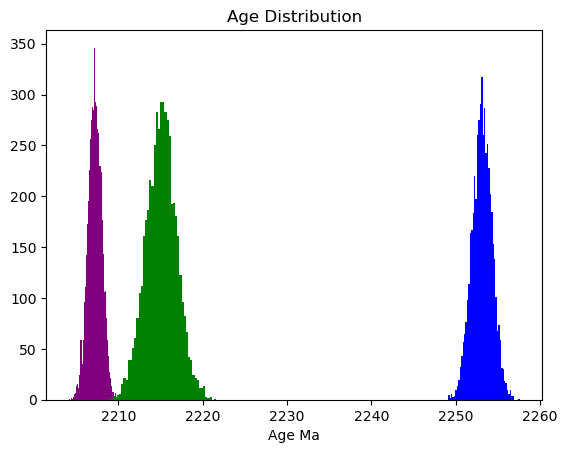

5000 ages ages_1f.txt
5000 ages ages_2f.txt
5000 ages ages_3f.txt


In [21]:
#Generate Gaussian Age distributions for each pole
age1_mean=2207.2
st_dev1=0.8
age2_mean=2215.0
st_dev2=1.8
age3_mean=2253.1
st_dev3=1.2
age_1f=np.random.normal(age1_mean, st_dev1, 5000)
age_2f=np.random.normal(age2_mean, st_dev2, 5000)
age_3f=np.random.normal(age3_mean, st_dev3, 5000)
#Calculate 1st age differences
agedif=abs(age_1f-age_2f)
rate=(distances/agedif)
rate2=rate/10
#calculate 2nd age difference
agedif2=abs(age_2f-age_3f)
rate3=(distances2/agedif2)
rate4=rate3/10
#age histogram
# Create histogram
plt.hist(age_1f, color = "purple", bins=50)
plt.hist(age_2f, color="green", bins=50)
plt.hist(age_3f, color="blue", bins=50)
# Set title and axis labels
plt.title('Age Distribution')
plt.xlabel('Age Ma')
#####Put Figure File save location next####
plt.savefig('GaussAge.svg')
# Display the histogram
plt.show()
#save the age 1  files
output_file_path = 'ages_1f.txt'
with open(output_file_path, 'w') as output_file:
    for number in age_1f:
        output_file.write(str(number) + '\n')

print(f'5000 ages {output_file_path}')
#save the age 2 files
output_file_path = 'ages_2f.txt'
with open(output_file_path, 'w') as output_file:
    for number in age_2f:
        output_file.write(str(number) + '\n')

print(f'5000 ages {output_file_path}')
#save the age 3 files
output_file_path = 'ages_3f.txt'
with open(output_file_path, 'w') as output_file:
    for number in age_3f:
        output_file.write(str(number) + '\n')

print(f'5000 ages {output_file_path}')

7.87 Mean Age Difference 1
2.00 Standard Deviation 1
38.03 Mean Age Difference 2
2.17 Standard Deviation 2


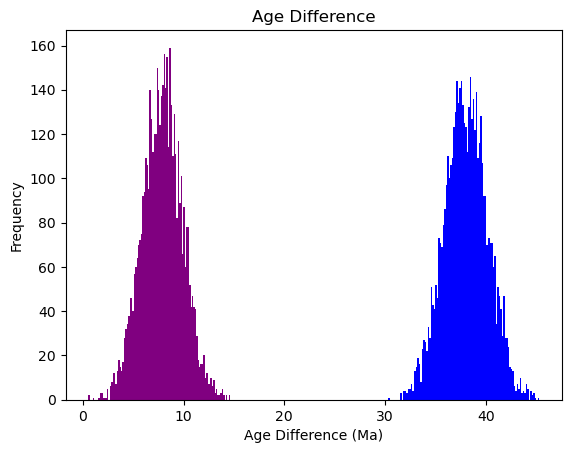

In [22]:
#plot age histogram
y=statistics.mean(agedif)
z=statistics.stdev(agedif)
f=statistics.mean(agedif2)
g=statistics.stdev(agedif2)
print("{:.2f}".format(y),"Mean Age Difference 1")
print("{:.2f}".format(z),"Standard Deviation 1")
print("{:.2f}".format(f),"Mean Age Difference 2")
print("{:.2f}".format(g),"Standard Deviation 2")
# Create histogram
plt.hist(agedif, color = "purple",bins=100)
plt.hist(agedif2, color= "blue", bins=100)
# Set title and axis labels
plt.title('Age Difference')
plt.xlabel('Age Difference (Ma)')
plt.ylabel('Frequency')
#####Put Figure File save location next####
plt.savefig('agedifhist.svg')
# Display the histogram
plt.show()

31.17 Mean Rate 1 (cm/yr)
17.42 Standard Deviation 1
4.52 Mean Rate 2 (cm/yr)
1.65 Standard Deviation 2


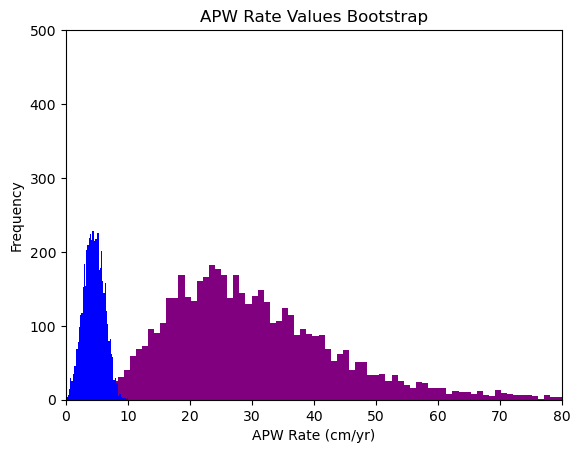

In [23]:
#plot histograms of great-circle distance for each bootstrapped pair
y=statistics.mean(rate2)
z=statistics.stdev(rate2)
f=statistics.mean(rate4)
g=statistics.stdev(rate4)
print("{:.2f}".format(y),"Mean Rate 1 (cm/yr)")
print("{:.2f}".format(z),"Standard Deviation 1")
print("{:.2f}".format(f),"Mean Rate 2 (cm/yr)")
print("{:.2f}".format(g),"Standard Deviation 2")
plt.xlim(0,80)
plt.ylim(0,500)
# Create histogram
plt.hist(rate2, color = "purple",bins=500)
plt.hist(rate4, color = "blue",bins=50)
# Set title and axis labels
plt.title('APW Rate Values Bootstrap')
plt.xlabel('APW Rate (cm/yr)')
plt.ylabel('Frequency')
#####Put Figure File save location next####
plt.savefig('APWratehist.svg')
# Display the histogram
plt.show()

2257.16 Great Circle Distance 1
812.28 Standard Deviation 1
1714.99 Great Circle Distance 2
616.79 Standard Deviation 2


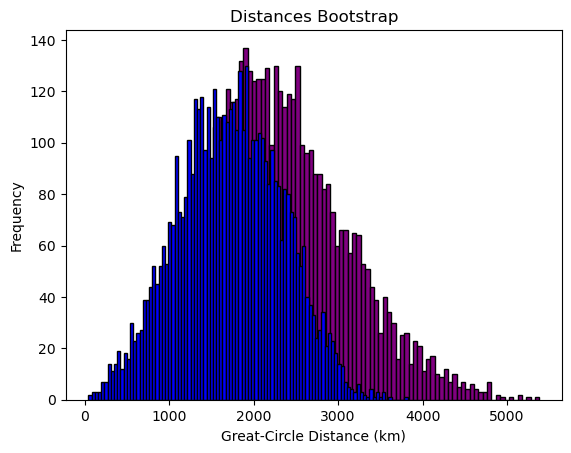

In [24]:
#plot histograms of great-circle distance for each bootstrapped pair
y=statistics.mean(distances)
z=statistics.stdev(distances)
f=statistics.mean(distances2)
g=statistics.stdev(distances2)
print("{:.2f}".format(y),"Great Circle Distance 1")
print("{:.2f}".format(z),"Standard Deviation 1")
print("{:.2f}".format(f),"Great Circle Distance 2")
print("{:.2f}".format(g),"Standard Deviation 2")
# Create histogram
plt.hist(distances, color = "purple", ec="black",bins=100)
plt.hist(distances2, color = "blue", ec="black",bins=100)
# Set title and axis labels
plt.title('Distances Bootstrap')
plt.xlabel('Great-Circle Distance (km)')
plt.ylabel('Frequency')
#####Put Figure File save location next####
plt.savefig('distances.svg')
# Display the histogram
plt.show()


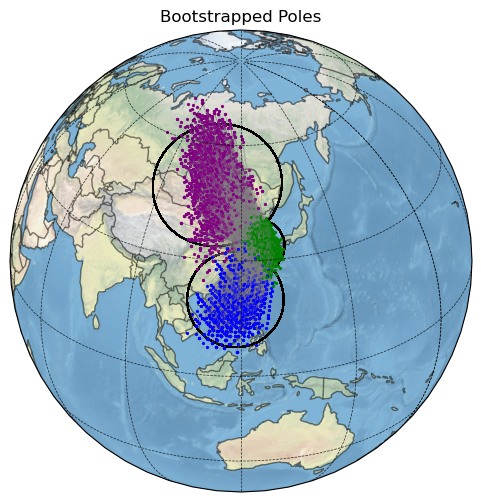

In [25]:
# Plot the great circles and lat, long pairs on an orthographic map
#2207 Ma pole
mean_lati=49.8
mean_longi= 110.5
a95_radius= 16.4
#2216 Ma Pole
mean_lati2=33.7
mean_longi2=125.3
a95_radius2=6.5
#2252 Ma pole
mean_lati3=20.2
mean_longi3=118.5
a95_radius3=12.1
#plot figure
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Orthographic(central_longitude=120, central_latitude=30))

ax.add_feature(cfeature.LAND, edgecolor='black',  alpha=0.3)
ax.add_feature(cfeature.COASTLINE, edgecolor='black', alpha=0.5)
ax.add_feature(cfeature.OCEAN, facecolor='lightblue', edgecolor='black', alpha=0.8)
ax.add_feature(cfeature.BORDERS, edgecolor='black', alpha=0.5)
ax.stock_img()
# Add graticules (latitude and longitude lines)
ax.gridlines(xlocs=range(-180, 181, 30), ylocs=range(-90, 91, 30), linewidth=0.5, linestyle='--', color='black', alpha=0.8)

for i in range(data_array1.shape[0]):
    lat1, lon1 = data_array1[i]
    lat2, lon2 = data_array2[i]
    lat3, lon3 = data_array3[i]

    ax.plot([lon1, lon2], [lat1, lat2],color="grey",
            transform=ccrs.Geodetic(),
            linewidth=.1)
    ax.plot([lon2, lon3], [lat2, lat3],color="grey",
            transform=ccrs.Geodetic(),
            linewidth=.1)


    ax.plot(lon1, lat1, 'o', markersize=1.3, color='purple', transform=ccrs.PlateCarree())
    ax.plot(lon2, lat2, 'o', markersize=1.3, color='green', transform=ccrs.PlateCarree())
    ax.plot(lon3, lat3, 'o', markersize=1.3, color='blue', transform=ccrs.PlateCarree())


# Plot the a95 solid circle
    ax.tissot(rad_km=a95_radius * 111, lons=mean_longi, lats=mean_lati, n_samples=100, facecolor='none', edgecolor='black', linewidth=1)
    ax.tissot(rad_km=a95_radius2 * 111, lons=mean_longi2, lats=mean_lati2, n_samples=100, facecolor='none', edgecolor='black', linewidth=1)
    ax.tissot(rad_km=a95_radius3 * 111, lons=mean_longi3, lats=mean_lati3, n_samples=100, facecolor='none', edgecolor='black', linewidth=1)

       
    ax.set_global()
plt.title('Bootstrapped Poles')
plt.savefig('mapofbootpoles.svg')
plt.show()

2207.20 Mean Age-1
0.81 Standard Deviation
2215.07 Mean Age-2
1.81 Standard Deviation
2253.10 Mean Age-3
1.19 Standard Deviation
46.43 Paleolatitude-1
4.69 Standard Deviation
42.93 Paleolatitude-2
1.69 Standard Deviation
50.05 Paleolatitude-3
3.56 Standard Deviation


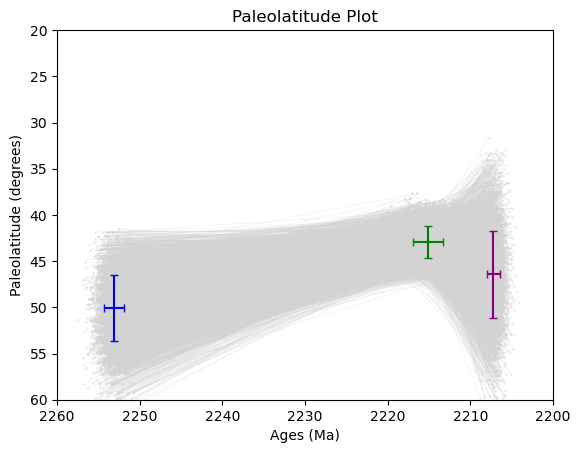

4.96 cm/year latitudinal rate: pole 2216-2207
2.08 cm/year latitudinal rate: pole 2252-2216


<Figure size 640x480 with 0 Axes>

In [26]:
# Read x and y values from separate files
def read_values(file_path):
    with open(file_path, 'r') as file:
        values = [float(line.strip()) for line in file.readlines()]
    return values

x1_file_path = 'c:\\users\\jmeer\\PmagPy\\ages_1f.txt'
x2_file_path = 'c:\\users\\jmeer\\PmagPy\\ages_2f.txt'
x3_file_path = 'c:\\users\\jmeer\\PmagPy\\ages_3f.txt'
y1_file_path = 'c:\\users\\jmeer\\PmagPy\\plat_1f.txt'
y2_file_path = 'c:\\users\\jmeer\\PmagPy\\plat_2f.txt'
y3_file_path = 'c:\\users\\jmeer\\PmagPy\\plat_3f.txt'

x1 = read_values(x1_file_path)
x2 = read_values(x2_file_path)
x3 = read_values(x3_file_path)
y1 = read_values(y1_file_path)
y2 = read_values(y2_file_path)
y3 = read_values(y3_file_path)


p=statistics.mean(x1)
t=statistics.stdev(x1)
p2=statistics.mean(x2)
t2=statistics.stdev(x2)
r=statistics.mean(y1)
s=statistics.stdev(y1)
r2=statistics.mean(y2)
s2=statistics.stdev(y2)
q=statistics.mean(x3)
l=statistics.stdev(x3)
q2=statistics.mean(y3)
l2=statistics.stdev(y3)
print("{:.2f}".format(p), "Mean Age-1")
print("{:.2f}".format(t),"Standard Deviation")
print("{:.2f}".format(p2),"Mean Age-2")
print("{:.2f}".format(t2),"Standard Deviation")
print("{:.2f}".format(q),"Mean Age-3")
print("{:.2f}".format(l),"Standard Deviation")
print("{:.2f}".format(r),"Paleolatitude-1")
print("{:.2f}".format(s),"Standard Deviation")
print("{:.2f}".format(r2),"Paleolatitude-2")
print("{:.2f}".format(s2),"Standard Deviation")
print("{:.2f}".format(q2),"Paleolatitude-3")
print("{:.2f}".format(l2),"Standard Deviation")
###################
# Plotting values
mean_x1 = p
std_dev_x1 = t
mean_x2 = p2
std_dev_x2 = t2
mean_y1 = r
std_dev_y1 = s
mean_y2 = r2
std_dev_y2 = s2
mean_x3= q
std_dev_x3=l
mean_y3= q2
std_dev_y3=l2

# Plot and connect points
for i in range(len(x1)):
    plt.plot([x1[i], x2[i]], [y1[i], y2[i]], marker='o', markersize=0.9, color='lightgrey', linewidth=0.5, linestyle='-',alpha=.3)
for i in range(len(x3)):
    plt.plot([x2[i], x3[i]], [y2[i], y3[i]], marker='o', markersize=0.9, color='lightgrey', linewidth=0.5, linestyle='-',alpha=.3)

# Set plot title and labels
plt.title('Paleolatitude Plot')
plt.xlabel('Ages (Ma)')
plt.ylabel('Paleolatitude (degrees)')
plt.xlim(2200,2260)
plt.ylim(60,20)
# Show legend
#plt.legend()

#invert x-axis
plt.gca().invert_xaxis()

#plot error bars
plt.errorbar(mean_x1, mean_y1, xerr=std_dev_x1, yerr=std_dev_y1, linestyle='none', ecolor='purple', label='Error Bars', capsize=3)
plt.errorbar(mean_x2, mean_y2, xerr=std_dev_x2, yerr=std_dev_y2, linestyle='none', ecolor='green', label='Error Bars', capsize=3)
plt.errorbar(mean_x3, mean_y3, xerr=std_dev_x3, yerr=std_dev_y3, linestyle='none', ecolor='blue', label='Error Bars', capsize=3)

# Display plot
plt.show()
#####Put Figure File save location next####
plt.savefig('latitudeplot.svg')
#Calculate Mean Latitudinal Drift Rate
Drate=((r-r2)/(p2-p))*11.13
Drate2= ((q2-r2)/(q-p2))*11.13
print("{:.2f}".format(Drate),"cm/year latitudinal rate: pole 2216-2207")
print("{:.2f}".format(Drate2),"cm/year latitudinal rate: pole 2252-2216")

